In [71]:
import pandas as pd
import os
import numpy as np


In [148]:
os.chdir("C:\\Users\\pbj2766\\Documents\\Data Science\\Yelp")

In [159]:
business = pd.read_json('business.json', lines=True)

In [160]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [161]:
os.getcwd()

'C:\\Users\\pbj2766\\Documents\\Data Science\\Yelp'

In [162]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [163]:
business.shape

(192609, 14)

In [164]:
# task: create a list of columns to drop, call it drop_cols
# then go ahead and drop those columns from the DataFrame
# two lines of code here:
drop_cols = ['address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'city']
business.drop(drop_cols, axis = 1, inplace = True)


In [153]:
business.shape

(192609, 5)

In [166]:
business.head()

,business_id,state,stars,review_count,categories
0,1SWheh84yJXfytovILXOAQ,AZ,3.0,5,"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,ON,2.5,128,"Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,NC,4.0,170,"Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,AZ,5.0,3,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,NC,4.0,4,"Plumbing, Shopping, Local Services, Home Servi..."


In [88]:
# print the first element of business['categories']
print(business.categories[0])

Golf, Active Life


In [89]:
# what is the type of this element?
type(business.categories[0])

str

In [90]:
# if the first element were a list, this would return 'Tours', not 'T'
business.categories[0][0]

'G'

In [167]:
# task: split the categories column (a pandas Series) into lists of categories,
# e.g. the string "Category1, Category2" becomes the list ["Category1", "Category2"]
# hint: pass the argument pat = ', ?' in to split on a comma which may be followed by a space
business['categories'] = business['categories'].str.split(pat = ', ')

In [170]:
business.head()

,business_id,state,stars,review_count,categories
0,1SWheh84yJXfytovILXOAQ,AZ,3.0,5,"[Golf, Active Life]"
1,QXAEGFB4oINsVuTFxEYKFQ,ON,2.5,128,"[Specialty Food, Restaurants, Dim Sum, Importe..."
2,gnKjwL_1w79qoiV3IC_xQQ,NC,4.0,170,"[Sushi Bars, Restaurants, Japanese]"
3,xvX2CttrVhyG2z1dFg_0xw,AZ,5.0,3,"[Insurance, Financial Services]"
4,HhyxOkGAM07SRYtlQ4wMFQ,NC,4.0,4,"[Plumbing, Shopping, Local Services, Home Serv..."


In [171]:
# task: count the frequency of each item in categories and keep the top twenty
# hint: the latter can be done by passing an argument to the head method
# assign the result to the variable category_counts - one line of code here:
categories_series = business['categories'].apply(pd.Series).stack().reset_index(drop=True)

KeyboardInterrupt: 

In [ ]:
category_counts = categories_series.value_counts().nlargest(20)

In [ ]:
print(category_counts)

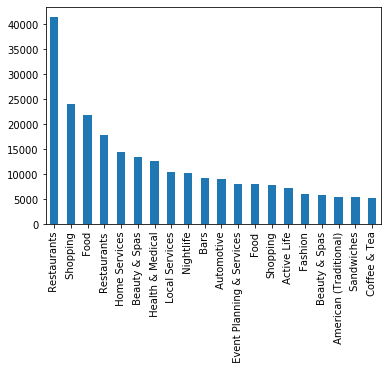

In [95]:
category_counts.plot(kind='bar')

# Missing Categories

How many null (missing) categories are there?

In [172]:
pd.isna(business['categories']).sum()

482

In [173]:
business.loc[pd.isna(business['categories'])].head()

,business_id,state,stars,review_count,categories
265,xOR85RicYj642O3_iJ7hgg,AZ,3.5,3,None
597,tWvep1usNNI3NYkoRbSb7g,AB,1.0,3,None
1020,llG2YxnevtFhW7LVa4QJXQ,PA,2.0,5,None
1332,zi2CV7isWyGRxVXJxdDQXg,NC,1.5,3,None
1770,oyPZZX2fQYpSBHk25tL26A,ON,4.5,6,None


In [174]:
business = business.loc[~pd.isna(business['categories'])]

In [175]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [176]:
business.head()

,business_id,state,stars,review_count,categories
1,QXAEGFB4oINsVuTFxEYKFQ,ON,2.5,128,"[Specialty Food, Restaurants, Dim Sum, Importe..."
2,gnKjwL_1w79qoiV3IC_xQQ,NC,4.0,170,"[Sushi Bars, Restaurants, Japanese]"
11,1Dfx3zM-rW4n-31KeC8sJg,AZ,3.0,18,"[Restaurants, Breakfast & Brunch, Mexican, Tac..."
13,fweCYi8FmbJXHCqLnwuk8w,OH,4.0,16,"[Italian, Restaurants, Pizza, Chicken Wings]"
17,PZ-LZzSlhSe9utkQYU8pFg,NV,4.0,40,"[Restaurants, Italian]"


In [177]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

KeyboardInterrupt: 

In [ ]:
business.shape

In [178]:
restaurant_category_counts.head()

Restaurants    17948
 Food           2907
 Pizza          2163
 Fast Food      2054
 Sandwiches     1713
dtype: int64

In [179]:
business

,business_id,state,stars,review_count,categories
1,QXAEGFB4oINsVuTFxEYKFQ,ON,2.5,128,"[Specialty Food, Restaurants, Dim Sum, Importe..."
2,gnKjwL_1w79qoiV3IC_xQQ,NC,4.0,170,"[Sushi Bars, Restaurants, Japanese]"
11,1Dfx3zM-rW4n-31KeC8sJg,AZ,3.0,18,"[Restaurants, Breakfast & Brunch, Mexican, Tac..."
13,fweCYi8FmbJXHCqLnwuk8w,OH,4.0,16,"[Italian, Restaurants, Pizza, Chicken Wings]"
17,PZ-LZzSlhSe9utkQYU8pFg,NV,4.0,40,"[Restaurants, Italian]"
...,...,...,...,...,...
192587,oS0CnUbyv0GUoD3L8_3UPQ,ON,4.0,113,"[Restaurants, Thai]"
192589,ghovD5ZTGDQ5Q2U4ERddWw,OH,4.0,22,"[Burgers, Restaurants, Fast Food, American (New)]"
192595,h3QErqS3OZgLJ5Tb6-sLyQ,ON,4.5,4,"[Restaurants, Soup, Chinese, Caribbean]"
192596,KnafX7T6qSAmSrLhd709vA,QC,4.0,25,"[Vietnamese, Soup, Restaurants]"


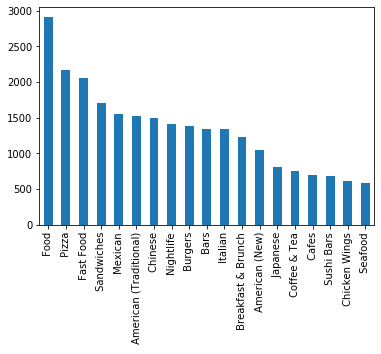

In [107]:
restaurant_category_counts[1:].plot(kind='bar')

In [129]:
type(business['categories'])

pandas.core.series.Series

In [206]:
mask = business['categories'].apply(lambda x: ('Pizza' or 'Italian') in x)
new_data= business[mask]

In [211]:
new_data[['business_id', 'review_count', 'stars', 'state']].to_csv('output1.csv', index= False)


In [212]:
.shapitalian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza') in x), :]

SyntaxError: invalid syntax (<ipython-input-212-740f860ad10e>, line 1)

In [122]:
italian_pizza

,business_id,stars,review_count,categories


In [109]:
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza' or 'Italian') in x), :]

In [110]:
italian_pizza

,business_id,stars,review_count,categories


In [52]:
italian_pizza.info

<bound method DataFrame.info of Empty DataFrame
Columns: [business_id, stars, review_count, categories]
Index: []>

In [53]:
business.head()

,business_id,stars,review_count,categories
11,1Dfx3zM-rW4n-31KeC8sJg,3.0,18,"[Restaurants, Breakfast & Brunch, Mexican, ..."
17,PZ-LZzSlhSe9utkQYU8pFg,4.0,40,"[Restaurants, Italian]"
32,SP_YXIEwkFPPl_9anCYmpQ,3.5,29,"[Restaurants, Nightlife, Breakfast & Brunch,..."
50,mlHC2XcU9Bows6cnYEmRgg,4.0,9,"[Restaurants, Breakfast & Brunch, Bars, Mod..."
71,9UTpmQ4OhX5jNFUIu7dPPQ,4.0,103,"[Restaurants, Korean]"
